In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.tools.eval_measures as em
import copy
import os
import pylab 
import warnings  
import nltk
import random
import string
import json
import re
import itertools
from os import system
from numpy import where
from pylab import rcParams
# from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo
from IPython.display import Image
from bs4 import BeautifulSoup
from collections import Counter
# from imblearn.over_sampling import SMOTE
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
#from wordcloud import WordCloud,STOPWORDS
from scipy.stats import ttest_1samp as tts1
from scipy.stats import ttest_ind as tts
from scipy.stats import ttest_rel as ttr
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, ward
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, roc_auc_score, roc_curve, classification_report, confusion_matrix,mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

from nltk.corpus import movie_reviews, inaugural, stopwords

warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('classic')
sns.set(color_codes = True)
sns.set_palette('Greens_r')
sns.set_style('ticks')
sns.set_context('notebook')

In [140]:
df = pd.read_csv(r'Data.csv')
df.head()

applicant_id  years_of_insurance_with_us  regular_checkup_lasy_year  \
0          5000                           3                          1   
1          5001                           0                          0   
2          5002                           1                          0   
3          5003                           7                          4   
4          5004                           3                          1   

   adventure_sports Occupation  visited_doctor_last_1_year cholesterol_level  \
0                 1    Salried                           2        125 to 150   
1                 0    Student                           4        150 to 175   
2                 0   Business                           4        200 to 225   
3                 0   Business                           2        175 to 200   
4                 0    Student                           2        150 to 175   

   daily_avg_steps  age  heart_decs_history  ...   smoking_status  \
0             4866   28                   1  ...          Unknown   
1             6411   50                   0  ...  formerly smoked   
2             4509   68                   0  ...  formerly smoked   
3             6214   51                   0  ...          Unknown   
4             4938   44                   0  ...     never smoked   

  Year_last_admitted   Location  weight covered_by_any_other_company  Alcohol  \
0                NaN    Chennai      67                            N     Rare   
1                NaN     Jaipur      58                            N     Rare   
2                NaN     Jaipur      73                            N    Daily   
3                NaN    Chennai      71                            Y     Rare   
4             2004.0  Bangalore      74                            N       No   

   exercise  weight_change_in_last_one_year fat_percentage insurance_cost  
0  Moderate                               1             25          20978  
1  Moderate                               3             27           6170  
2   Extreme                               0             32          28382  
3        No                               3             37          27148  
4   Extreme                               0             34          29616  

[5 rows x 24 columns]

In [141]:
df = df.rename(columns = {
                        'years_of_insurance_with_us':'YOI_us',
                        'regular_checkup_lasy_year' :'Reg_checkup_lst_yr',
                        'adventure_sports'          :'Adv_sports',
                        'visited_doctor_last_1_year':'Dr_visit_lst_yr',
                        'cholesterol_level'         :'Cholesterol_level',
                        'daily_avg_steps'           :'Daily_avg_steps',
                        'age'                       :'Age',
                        'heart_decs_history'        :'Hrt_disease_hist',
                        'other_major_decs_history'  :'Othr_mjr_disease_hist',
                        'avg_glucose_level'         :'Avg_glucose_lvl',
                        'bmi'                       :'BMI',
                        'smoking_status'            :'Smoking_status',
                        'Year_last_admitted'        :'Year_last_admtd',
                        'weight'                    :'Weight',
                        'fat_percentage'            :'Fat_prcnt',
                        'covered_by_any_other_company':'Other_company_cover',
                        'exercise'                  :'Exercise',
                        'weight_change_in_last_one_year':'Wt_chng_lst_yr',
                        'insurance_cost': 'Insurance_cst'
                        })
df.head()

applicant_id  YOI_us  Reg_checkup_lst_yr  Adv_sports Occupation  \
0          5000       3                   1           1    Salried   
1          5001       0                   0           0    Student   
2          5002       1                   0           0   Business   
3          5003       7                   4           0   Business   
4          5004       3                   1           0    Student   

   Dr_visit_lst_yr Cholesterol_level  Daily_avg_steps  Age  Hrt_disease_hist  \
0                2        125 to 150             4866   28                 1   
1                4        150 to 175             6411   50                 0   
2                4        200 to 225             4509   68                 0   
3                2        175 to 200             6214   51                 0   
4                2        150 to 175             4938   44                 0   

   ...   Smoking_status Year_last_admtd   Location  Weight  \
0  ...          Unknown             NaN    Chennai      67   
1  ...  formerly smoked             NaN     Jaipur      58   
2  ...  formerly smoked             NaN     Jaipur      73   
3  ...          Unknown             NaN    Chennai      71   
4  ...     never smoked          2004.0  Bangalore      74   

  Other_company_cover  Alcohol  Exercise  Wt_chng_lst_yr Fat_prcnt  \
0                   N     Rare  Moderate               1        25   
1                   N     Rare  Moderate               3        27   
2                   N    Daily   Extreme               0        32   
3                   Y     Rare        No               3        37   
4                   N       No   Extreme               0        34   

  Insurance_cst  
0         20978  
1          6170  
2         28382  
3         27148  
4         29616  

[5 rows x 24 columns]

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   applicant_id           25000 non-null  int64  
 1   YOI_us                 25000 non-null  int64  
 2   Reg_checkup_lst_yr     25000 non-null  int64  
 3   Adv_sports             25000 non-null  int64  
 4   Occupation             25000 non-null  object 
 5   Dr_visit_lst_yr        25000 non-null  int64  
 6   Cholesterol_level      25000 non-null  object 
 7   Daily_avg_steps        25000 non-null  int64  
 8   Age                    25000 non-null  int64  
 9   Hrt_disease_hist       25000 non-null  int64  
 10  Othr_mjr_disease_hist  25000 non-null  int64  
 11  Gender                 25000 non-null  object 
 12  Avg_glucose_lvl        25000 non-null  int64  
 13  BMI                    24010 non-null  float64
 14  Smoking_status         25000 non-null  object 
 15  Ye

In [143]:
df.describe().T

count          mean           std     min       25%  \
applicant_id           25000.0  17499.500000   7217.022701  5000.0  11249.75   
YOI_us                 25000.0      4.089040      2.606612     0.0      2.00   
Reg_checkup_lst_yr     25000.0      0.773680      1.199449     0.0      0.00   
Adv_sports             25000.0      0.081720      0.273943     0.0      0.00   
Dr_visit_lst_yr        25000.0      3.104200      1.141663     0.0      2.00   
Daily_avg_steps        25000.0   5215.889320   1053.179748  2034.0   4543.00   
Age                    25000.0     44.918320     16.107492    16.0     31.00   
Hrt_disease_hist       25000.0      0.054640      0.227281     0.0      0.00   
Othr_mjr_disease_hist  25000.0      0.098160      0.297537     0.0      0.00   
Avg_glucose_lvl        25000.0    167.530000     62.729712    57.0    113.00   
BMI                    24010.0     31.393328      7.876535    12.3     26.10   
Year_last_admtd        13119.0   2003.892217      7.581521  1990.0   1997.00   
Weight                 25000.0     71.610480      9.325183    52.0     64.00   
Wt_chng_lst_yr         25000.0      2.517960      1.690335     0.0      1.00   
Fat_prcnt              25000.0     28.812280      8.632382    11.0     21.00   
Insurance_cst          25000.0  27147.407680  14323.691832  2468.0  16042.00   

                           50%       75%      max  
applicant_id           17499.5  23749.25  29999.0  
YOI_us                     4.0      6.00      8.0  
Reg_checkup_lst_yr         0.0      1.00      5.0  
Adv_sports                 0.0      0.00      1.0  
Dr_visit_lst_yr            3.0      4.00     12.0  
Daily_avg_steps         5089.0   5730.00  11255.0  
Age                       45.0     59.00     74.0  
Hrt_disease_hist           0.0      0.00      1.0  
Othr_mjr_disease_hist      0.0      0.00      1.0  
Avg_glucose_lvl          168.0    222.00    277.0  
BMI                       30.5     35.60    100.6  
Year_last_admtd         2004.0   2010.00   2018.0  
Weight                    72.0     78.00     96.0  
Wt_chng_lst_yr             3.0      4.00      6.0  
Fat_prcnt                 31.0     36.00     42.0  
Insurance_cst          27148.0  37020.00  67870.0

In [144]:
print(df.describe.__doc__)


        Generate descriptive statistics.

        Descriptive statistics include those that summarize the central
        tendency, dispersion and shape of a
        dataset's distribution, excluding ``NaN`` values.

        Analyzes both numeric and object series, as well
        as ``DataFrame`` column sets of mixed data types. The output
        will vary depending on what is provided. Refer to the notes
        below for more detail.

        Parameters
        ----------
        percentiles : list-like of numbers, optional
            The percentiles to include in the output. All should
            fall between 0 and 1. The default is
            ``[.25, .5, .75]``, which returns the 25th, 50th, and
            75th percentiles.
        include : 'all', list-like of dtypes or None (default), optional
            A white list of data types to include in the result. Ignored
            for ``Series``. Here are the options:

            - 'all' : All columns of the input will be inc

In [145]:
for i in np.arange(1,23,1):
    print (df.columns[i],'\n',np.unique(df[df.columns[i]]))

YOI_us 
 [0 1 2 3 4 5 6 7 8]
Reg_checkup_lst_yr 
 [0 1 2 3 4 5]
Adv_sports 
 [0 1]
Occupation 
 ['Business' 'Salried' 'Student']
Dr_visit_lst_yr 
 [ 0  1  2  3  4  5  6  7  8  9 10 12]
Cholesterol_level 
 ['125 to 150' '150 to 175' '175 to 200' '200 to 225' '225 to 250']
Daily_avg_steps 
 [ 2034  2091  2138 ... 10777 11063 11255]
Age 
 [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74]
Hrt_disease_hist 
 [0 1]
Othr_mjr_disease_hist 
 [0 1]
Gender 
 ['Female' 'Male']
Avg_glucose_lvl 
 [ 57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150

In [146]:
df.isna().sum()

applicant_id                 0
YOI_us                       0
Reg_checkup_lst_yr           0
Adv_sports                   0
Occupation                   0
Dr_visit_lst_yr              0
Cholesterol_level            0
Daily_avg_steps              0
Age                          0
Hrt_disease_hist             0
Othr_mjr_disease_hist        0
Gender                       0
Avg_glucose_lvl              0
BMI                        990
Smoking_status               0
Year_last_admtd          11881
Location                     0
Weight                       0
Other_company_cover          0
Alcohol                      0
Exercise                     0
Wt_chng_lst_yr               0
Fat_prcnt                    0
Insurance_cst                0
dtype: int64

### Cleaning data


In [147]:
(990/25000)*100

3.9600000000000004

In [148]:
(11881/25000)*100

47.524

In [149]:
557/25000

0.02228

In [150]:
df.Year_last_admtd.value_counts()

2010.0    557
1995.0    538
2007.0    532
2002.0    520
2000.0    516
2013.0    516
1994.0    514
1998.0    514
1997.0    513
2009.0    512
1993.0    508
2001.0    507
2003.0    504
2008.0    503
1999.0    498
2014.0    496
2005.0    491
1996.0    487
2012.0    483
2004.0    481
2011.0    475
2006.0    472
2015.0    449
1992.0    382
2016.0    370
1991.0    276
2017.0    253
2018.0    130
1990.0    122
Name: Year_last_admtd, dtype: int64

In [151]:
df.drop_duplicates(inplace=True)

In [152]:
df.head()

applicant_id  YOI_us  Reg_checkup_lst_yr  Adv_sports Occupation  \
0          5000       3                   1           1    Salried   
1          5001       0                   0           0    Student   
2          5002       1                   0           0   Business   
3          5003       7                   4           0   Business   
4          5004       3                   1           0    Student   

   Dr_visit_lst_yr Cholesterol_level  Daily_avg_steps  Age  Hrt_disease_hist  \
0                2        125 to 150             4866   28                 1   
1                4        150 to 175             6411   50                 0   
2                4        200 to 225             4509   68                 0   
3                2        175 to 200             6214   51                 0   
4                2        150 to 175             4938   44                 0   

   ...   Smoking_status Year_last_admtd   Location  Weight  \
0  ...          Unknown             NaN    Chennai      67   
1  ...  formerly smoked             NaN     Jaipur      58   
2  ...  formerly smoked             NaN     Jaipur      73   
3  ...          Unknown             NaN    Chennai      71   
4  ...     never smoked          2004.0  Bangalore      74   

  Other_company_cover  Alcohol  Exercise  Wt_chng_lst_yr Fat_prcnt  \
0                   N     Rare  Moderate               1        25   
1                   N     Rare  Moderate               3        27   
2                   N    Daily   Extreme               0        32   
3                   Y     Rare        No               3        37   
4                   N       No   Extreme               0        34   

  Insurance_cst  
0         20978  
1          6170  
2         28382  
3         27148  
4         29616  

[5 rows x 24 columns]

In [153]:
df = df.drop(columns=['applicant_id','Year_last_admtd'], axis=1)
df.head()

YOI_us  Reg_checkup_lst_yr  Adv_sports Occupation  Dr_visit_lst_yr  \
0       3                   1           1    Salried                2   
1       0                   0           0    Student                4   
2       1                   0           0   Business                4   
3       7                   4           0   Business                2   
4       3                   1           0    Student                2   

  Cholesterol_level  Daily_avg_steps  Age  Hrt_disease_hist  \
0        125 to 150             4866   28                 1   
1        150 to 175             6411   50                 0   
2        200 to 225             4509   68                 0   
3        175 to 200             6214   51                 0   
4        150 to 175             4938   44                 0   

   Othr_mjr_disease_hist  ...   BMI   Smoking_status   Location Weight  \
0                      0  ...  31.2          Unknown    Chennai     67   
1                      0  ...  34.2  formerly smoked     Jaipur     58   
2                      0  ...  40.4  formerly smoked     Jaipur     73   
3                      0  ...  22.9          Unknown    Chennai     71   
4                      1  ...  26.5     never smoked  Bangalore     74   

  Other_company_cover  Alcohol  Exercise Wt_chng_lst_yr Fat_prcnt  \
0                   N     Rare  Moderate              1        25   
1                   N     Rare  Moderate              3        27   
2                   N    Daily   Extreme              0        32   
3                   Y     Rare        No              3        37   
4                   N       No   Extreme              0        34   

   Insurance_cst  
0          20978  
1           6170  
2          28382  
3          27148  
4          29616  

[5 rows x 22 columns]

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YOI_us                 25000 non-null  int64  
 1   Reg_checkup_lst_yr     25000 non-null  int64  
 2   Adv_sports             25000 non-null  int64  
 3   Occupation             25000 non-null  object 
 4   Dr_visit_lst_yr        25000 non-null  int64  
 5   Cholesterol_level      25000 non-null  object 
 6   Daily_avg_steps        25000 non-null  int64  
 7   Age                    25000 non-null  int64  
 8   Hrt_disease_hist       25000 non-null  int64  
 9   Othr_mjr_disease_hist  25000 non-null  int64  
 10  Gender                 25000 non-null  object 
 11  Avg_glucose_lvl        25000 non-null  int64  
 12  BMI                    24010 non-null  float64
 13  Smoking_status         25000 non-null  object 
 14  Location               25000 non-null  object 
 15  We

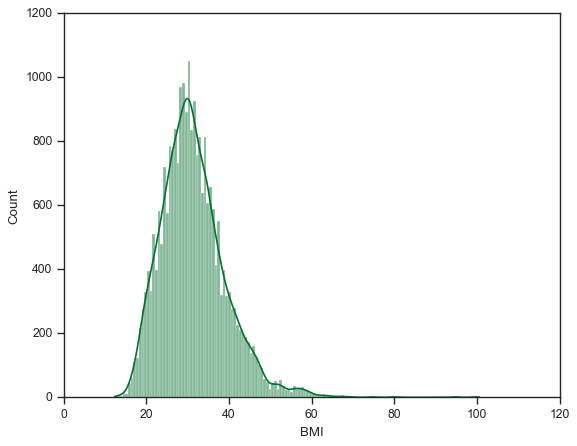

In [155]:
sns.histplot(df.BMI, kde= True);

## New data info

In [156]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24010 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YOI_us                 24010 non-null  int64  
 1   Reg_checkup_lst_yr     24010 non-null  int64  
 2   Adv_sports             24010 non-null  int64  
 3   Occupation             24010 non-null  object 
 4   Dr_visit_lst_yr        24010 non-null  int64  
 5   Cholesterol_level      24010 non-null  object 
 6   Daily_avg_steps        24010 non-null  int64  
 7   Age                    24010 non-null  int64  
 8   Hrt_disease_hist       24010 non-null  int64  
 9   Othr_mjr_disease_hist  24010 non-null  int64  
 10  Gender                 24010 non-null  object 
 11  Avg_glucose_lvl        24010 non-null  int64  
 12  BMI                    24010 non-null  float64
 13  Smoking_status         24010 non-null  object 
 14  Location               24010 non-null  object 
 15  We

In [157]:
df1 = df.select_dtypes(exclude=['object'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24010 entries, 0 to 24999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YOI_us                 24010 non-null  int64  
 1   Reg_checkup_lst_yr     24010 non-null  int64  
 2   Adv_sports             24010 non-null  int64  
 3   Dr_visit_lst_yr        24010 non-null  int64  
 4   Daily_avg_steps        24010 non-null  int64  
 5   Age                    24010 non-null  int64  
 6   Hrt_disease_hist       24010 non-null  int64  
 7   Othr_mjr_disease_hist  24010 non-null  int64  
 8   Avg_glucose_lvl        24010 non-null  int64  
 9   BMI                    24010 non-null  float64
 10  Weight                 24010 non-null  int64  
 11  Wt_chng_lst_yr         24010 non-null  int64  
 12  Fat_prcnt              24010 non-null  int64  
 13  Insurance_cst          24010 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 2.7 MB


In [158]:
df2 = df.select_dtypes(include=['object'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24010 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Occupation           24010 non-null  object
 1   Cholesterol_level    24010 non-null  object
 2   Gender               24010 non-null  object
 3   Smoking_status       24010 non-null  object
 4   Location             24010 non-null  object
 5   Other_company_cover  24010 non-null  object
 6   Alcohol              24010 non-null  object
 7   Exercise             24010 non-null  object
dtypes: object(8)
memory usage: 1.6+ MB


In [159]:
round(df.describe().T,2)

count      mean       std     min      25%      50%  \
YOI_us                 24010.0      4.09      2.61     0.0      2.0      4.0   
Reg_checkup_lst_yr     24010.0      0.77      1.20     0.0      0.0      0.0   
Adv_sports             24010.0      0.08      0.27     0.0      0.0      0.0   
Dr_visit_lst_yr        24010.0      3.11      1.14     0.0      2.0      3.0   
Daily_avg_steps        24010.0   5215.86   1053.56  2034.0   4543.0   5089.0   
Age                    24010.0     44.92     16.09    16.0     31.0     45.0   
Hrt_disease_hist       24010.0      0.05      0.22     0.0      0.0      0.0   
Othr_mjr_disease_hist  24010.0      0.09      0.29     0.0      0.0      0.0   
Avg_glucose_lvl        24010.0    167.53     62.73    57.0    113.0    168.0   
BMI                    24010.0     31.39      7.88    12.3     26.1     30.5   
Weight                 24010.0     71.62      9.33    52.0     64.0     72.0   
Wt_chng_lst_yr         24010.0      2.52      1.69     0.0      1.0      3.0   
Fat_prcnt              24010.0     28.82      8.63    11.0     21.0     31.0   
Insurance_cst          24010.0  27160.64  14332.04  2468.0  16042.0  27148.0   

                            75%      max  
YOI_us                     6.00      8.0  
Reg_checkup_lst_yr         1.00      5.0  
Adv_sports                 0.00      1.0  
Dr_visit_lst_yr            4.00     12.0  
Daily_avg_steps         5730.75  11255.0  
Age                       59.00     74.0  
Hrt_disease_hist           0.00      1.0  
Othr_mjr_disease_hist      0.00      1.0  
Avg_glucose_lvl          222.00    277.0  
BMI                       35.60    100.6  
Weight                    78.00     96.0  
Wt_chng_lst_yr             4.00      6.0  
Fat_prcnt                 36.00     42.0  
Insurance_cst          37020.00  67870.0

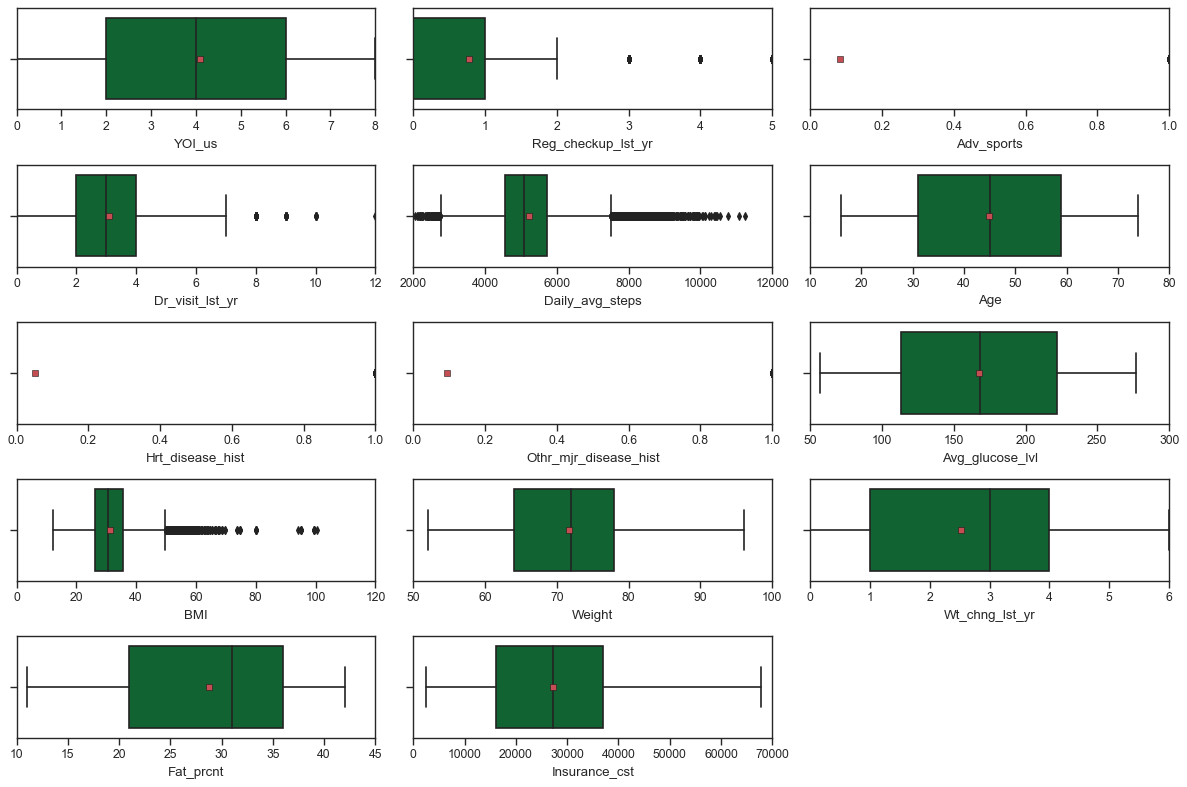

In [160]:
plt.figure(figsize=(15,10))
for i in np.arange(len(df1.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(df1[df1.columns[i]], showmeans= True)
    # print(df1[df1.columns[i]])
    # print(df1.columns[i])
plt.tight_layout()
plt.show()

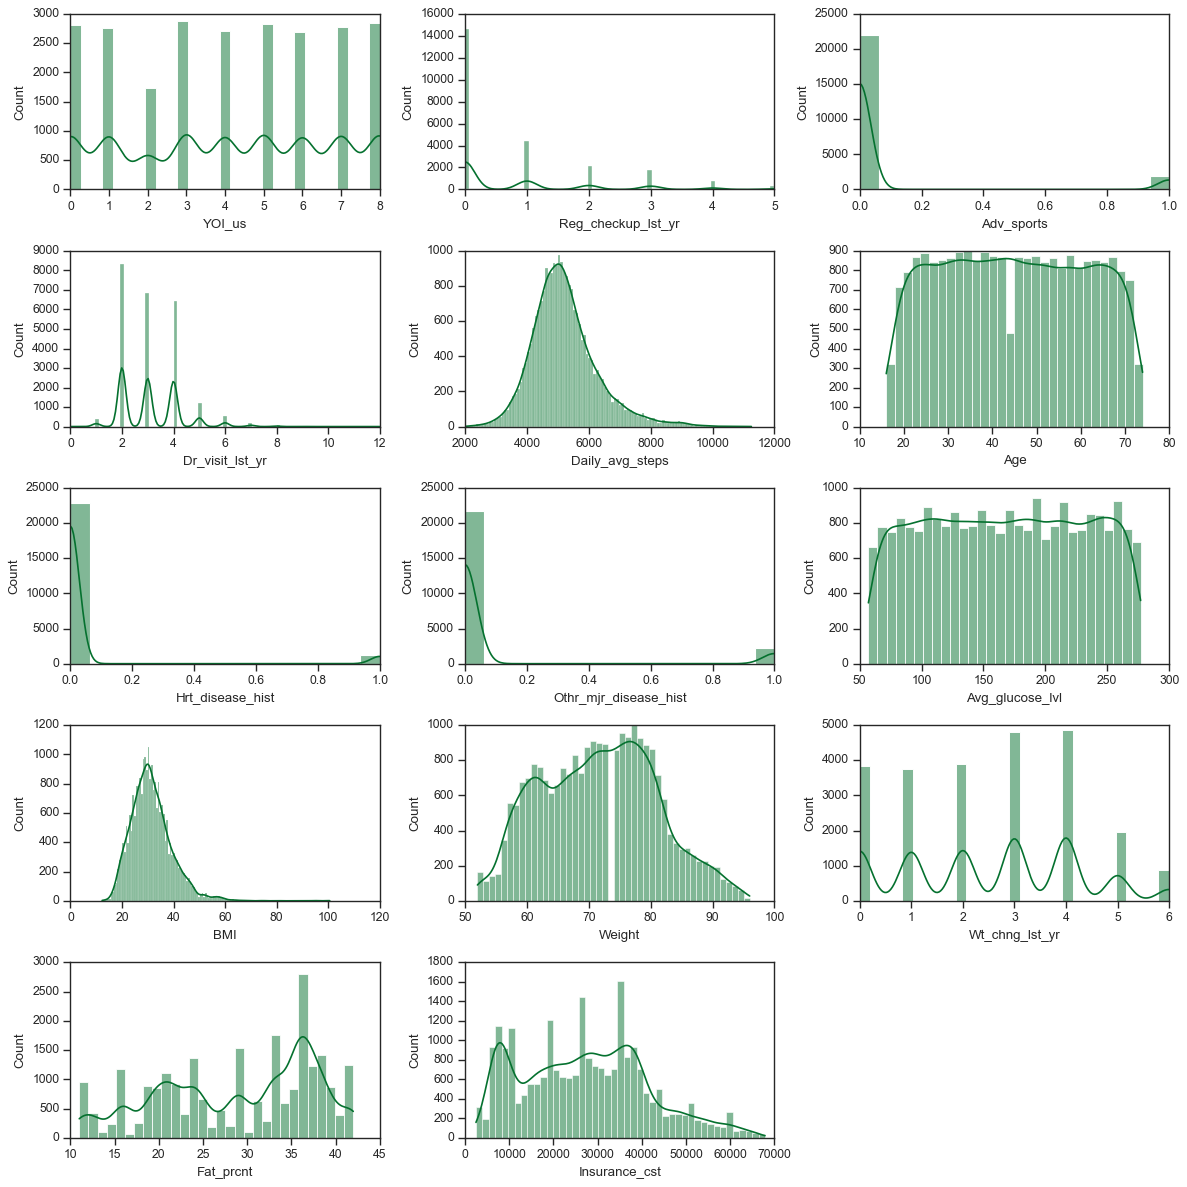

In [161]:
plt.figure(figsize=(15,15))
for i in np.arange(len(df1.columns)):
    plt.subplot(5,3,i+1)
    sns.histplot(df1[df1.columns[i]], kde= True)
    # print(df1[df1.columns[i]])
    # print(df1.columns[i])
plt.tight_layout()
plt.show()

In [162]:
d = []
for i in df1.columns:
    q1 = df1[i].quantile(q=0.25)
    q3 = df1[i].quantile(q=0.75)
    iqr = q3-q1
    ll = q1-1.5*iqr
    ul = q3+1.5*iqr
    lout = df1[i]<ll
    uout = df1[i]>ul
    # print (i,'\t', lout.sum(),'\t', uout.sum(), '\t', lout.sum()+uout.sum(), '\t', ((lout.sum()+uout.sum())/25000)*100)
    d.append({'Attribute' : i,
              'Lower_Outliers':lout.sum(),
              'Upper_Outliers':uout.sum(),
              'Total_Outliers':lout.sum()+uout.sum(),
              'Percentage_outliers':round(((lout.sum()+uout.sum())/25000)*100,2),
              'Skewness':round(df1[i].skew(),2)})
df_o = pd.DataFrame(d)
df_o

Attribute  Lower_Outliers  Upper_Outliers  Total_Outliers  \
0                  YOI_us               0               0               0   
1      Reg_checkup_lst_yr               0            2831            2831   
2              Adv_sports               0            1967            1967   
3         Dr_visit_lst_yr               0              92              92   
4         Daily_avg_steps              77             822             899   
5                     Age               0               0               0   
6        Hrt_disease_hist               0            1206            1206   
7   Othr_mjr_disease_hist               0            2222            2222   
8         Avg_glucose_lvl               0               0               0   
9                     BMI               0             549             549   
10                 Weight               0               0               0   
11         Wt_chng_lst_yr               0               0               0   
12              Fat_prcnt               0               0               0   
13          Insurance_cst               0               0               0   

    Percentage_outliers  Skewness  
0                  0.00     -0.07  
1                 11.32      1.61  
2                  7.87      3.05  
3                  0.37      0.98  
4                  3.60      0.91  
5                  0.00      0.01  
6                  4.82      4.12  
7                  8.89      2.81  
8                  0.00     -0.00  
9                  2.20      1.06  
10                 0.00      0.11  
11                 0.00      0.07  
12                 0.00     -0.37  
13                 0.00      0.33

#### Dealing with outliers

In [163]:
for i in (0,3,4,5,8,9,10,11,12,13):
    q1 = df[df1.columns[i]].quantile(q=0.25)
    q3 = df[df1.columns[i]].quantile(q=0.75)
    iqr = q3-q1
    ll = q1-1.5*iqr
    ul = q3+1.5*iqr
    df[df1.columns[i]] = np.where(df[df1.columns[i]]<ll, ll, df[df1.columns[i]])
    df[df1.columns[i]] = np.where(df[df1.columns[i]]>ul, ul, df[df1.columns[i]])

df1 = df.select_dtypes(exclude='object')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24010 entries, 0 to 24999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YOI_us                 24010 non-null  float64
 1   Reg_checkup_lst_yr     24010 non-null  int64  
 2   Adv_sports             24010 non-null  int64  
 3   Dr_visit_lst_yr        24010 non-null  float64
 4   Daily_avg_steps        24010 non-null  float64
 5   Age                    24010 non-null  float64
 6   Hrt_disease_hist       24010 non-null  int64  
 7   Othr_mjr_disease_hist  24010 non-null  int64  
 8   Avg_glucose_lvl        24010 non-null  float64
 9   BMI                    24010 non-null  float64
 10  Weight                 24010 non-null  float64
 11  Wt_chng_lst_yr         24010 non-null  float64
 12  Fat_prcnt              24010 non-null  float64
 13  Insurance_cst          24010 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 2.7 MB


In [164]:
round(df.describe().T,2)

count      mean       std      min      25%      50%  \
YOI_us                 24010.0      4.09      2.61     0.00      2.0      4.0   
Reg_checkup_lst_yr     24010.0      0.77      1.20     0.00      0.0      0.0   
Adv_sports             24010.0      0.08      0.27     0.00      0.0      0.0   
Dr_visit_lst_yr        24010.0      3.10      1.12     0.00      2.0      3.0   
Daily_avg_steps        24010.0   5189.05    969.94  2761.38   4543.0   5089.0   
Age                    24010.0     44.92     16.09    16.00     31.0     45.0   
Hrt_disease_hist       24010.0      0.05      0.22     0.00      0.0      0.0   
Othr_mjr_disease_hist  24010.0      0.09      0.29     0.00      0.0      0.0   
Avg_glucose_lvl        24010.0    167.53     62.73    57.00    113.0    168.0   
BMI                    24010.0     31.24      7.34    12.30     26.1     30.5   
Weight                 24010.0     71.62      9.33    52.00     64.0     72.0   
Wt_chng_lst_yr         24010.0      2.52      1.69     0.00      1.0      3.0   
Fat_prcnt              24010.0     28.82      8.63    11.00     21.0     31.0   
Insurance_cst          24010.0  27160.64  14332.04  2468.00  16042.0  27148.0   

                            75%       max  
YOI_us                     6.00      8.00  
Reg_checkup_lst_yr         1.00      5.00  
Adv_sports                 0.00      1.00  
Dr_visit_lst_yr            4.00      7.00  
Daily_avg_steps         5730.75   7512.38  
Age                       59.00     74.00  
Hrt_disease_hist           0.00      1.00  
Othr_mjr_disease_hist      0.00      1.00  
Avg_glucose_lvl          222.00    277.00  
BMI                       35.60     49.85  
Weight                    78.00     96.00  
Wt_chng_lst_yr             4.00      6.00  
Fat_prcnt                 36.00     42.00  
Insurance_cst          37020.00  67870.00

### Univariate Analysis

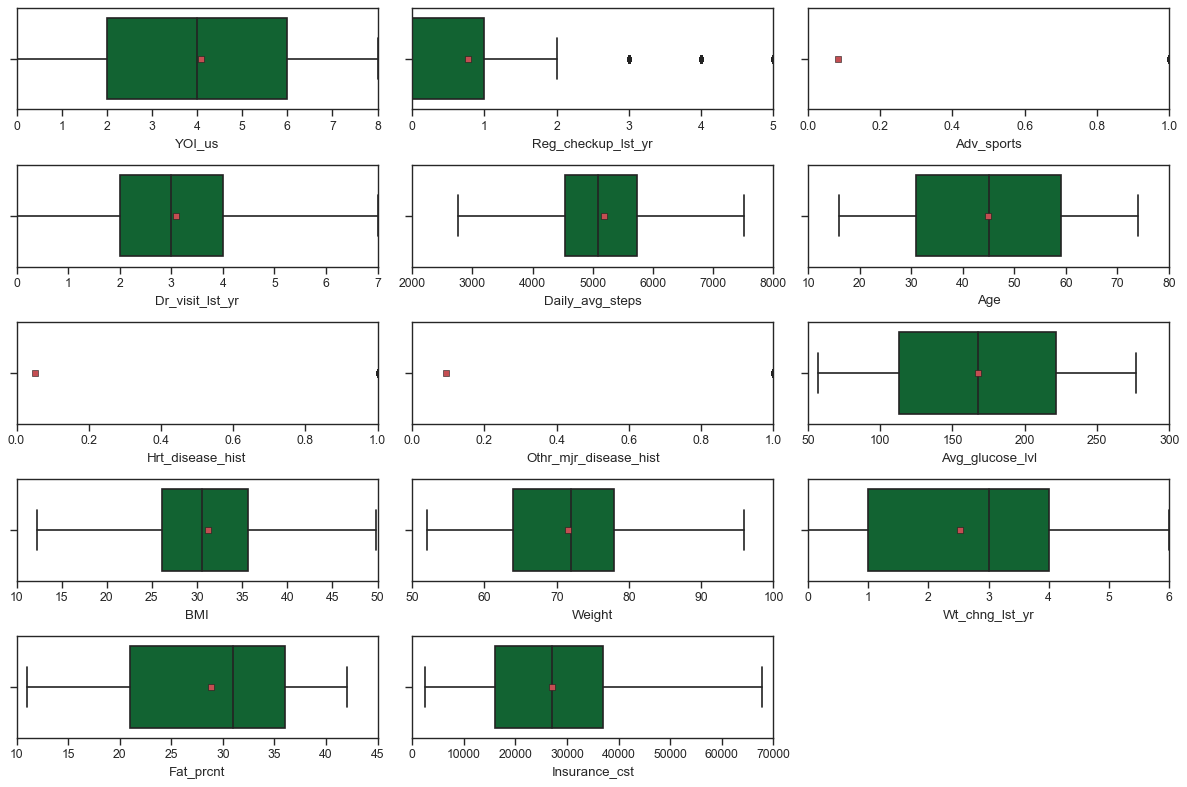

In [165]:
plt.figure(figsize=(15,10))
for i in np.arange(len(df1.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(df1[df1.columns[i]], showmeans= True)
    # print(df1[df1.columns[i]])
    # print(df1.columns[i])
plt.tight_layout()
plt.show()

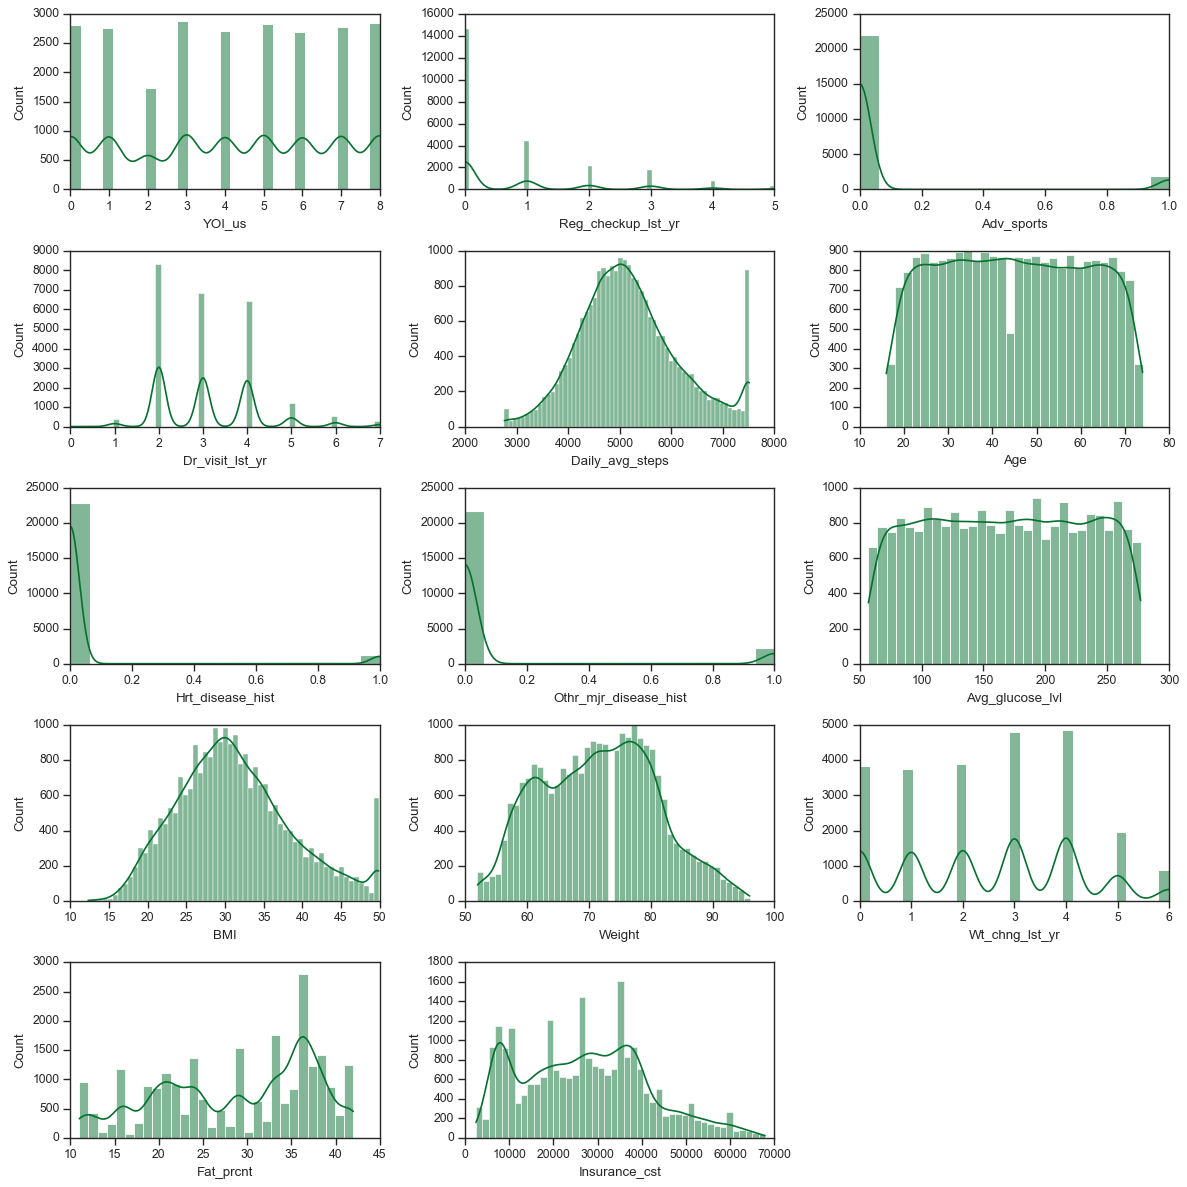

In [166]:
plt.figure(figsize=(15,15))
for i in np.arange(len(df1.columns)):
    plt.subplot(5,3,i+1)
    sns.histplot(df1[df1.columns[i]], kde= True)
    # print(df1[df1.columns[i]])
    # print(df1.columns[i])
plt.tight_layout()
plt.show()

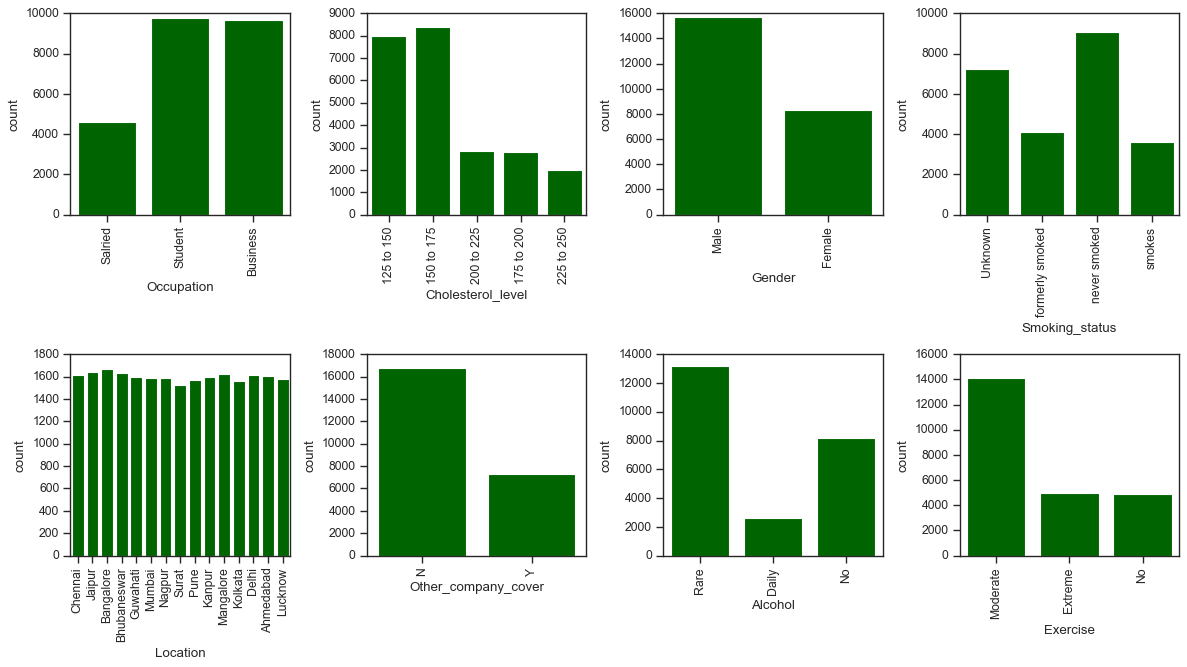

In [167]:
plt.figure(figsize=(15,20))
for i in np.arange(len(df2.columns)):
    plt.subplot(5,4,i+1)
    sns.countplot(df2[df2.columns[i]], saturation=1, color='darkGreen')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Bivariate Analysis

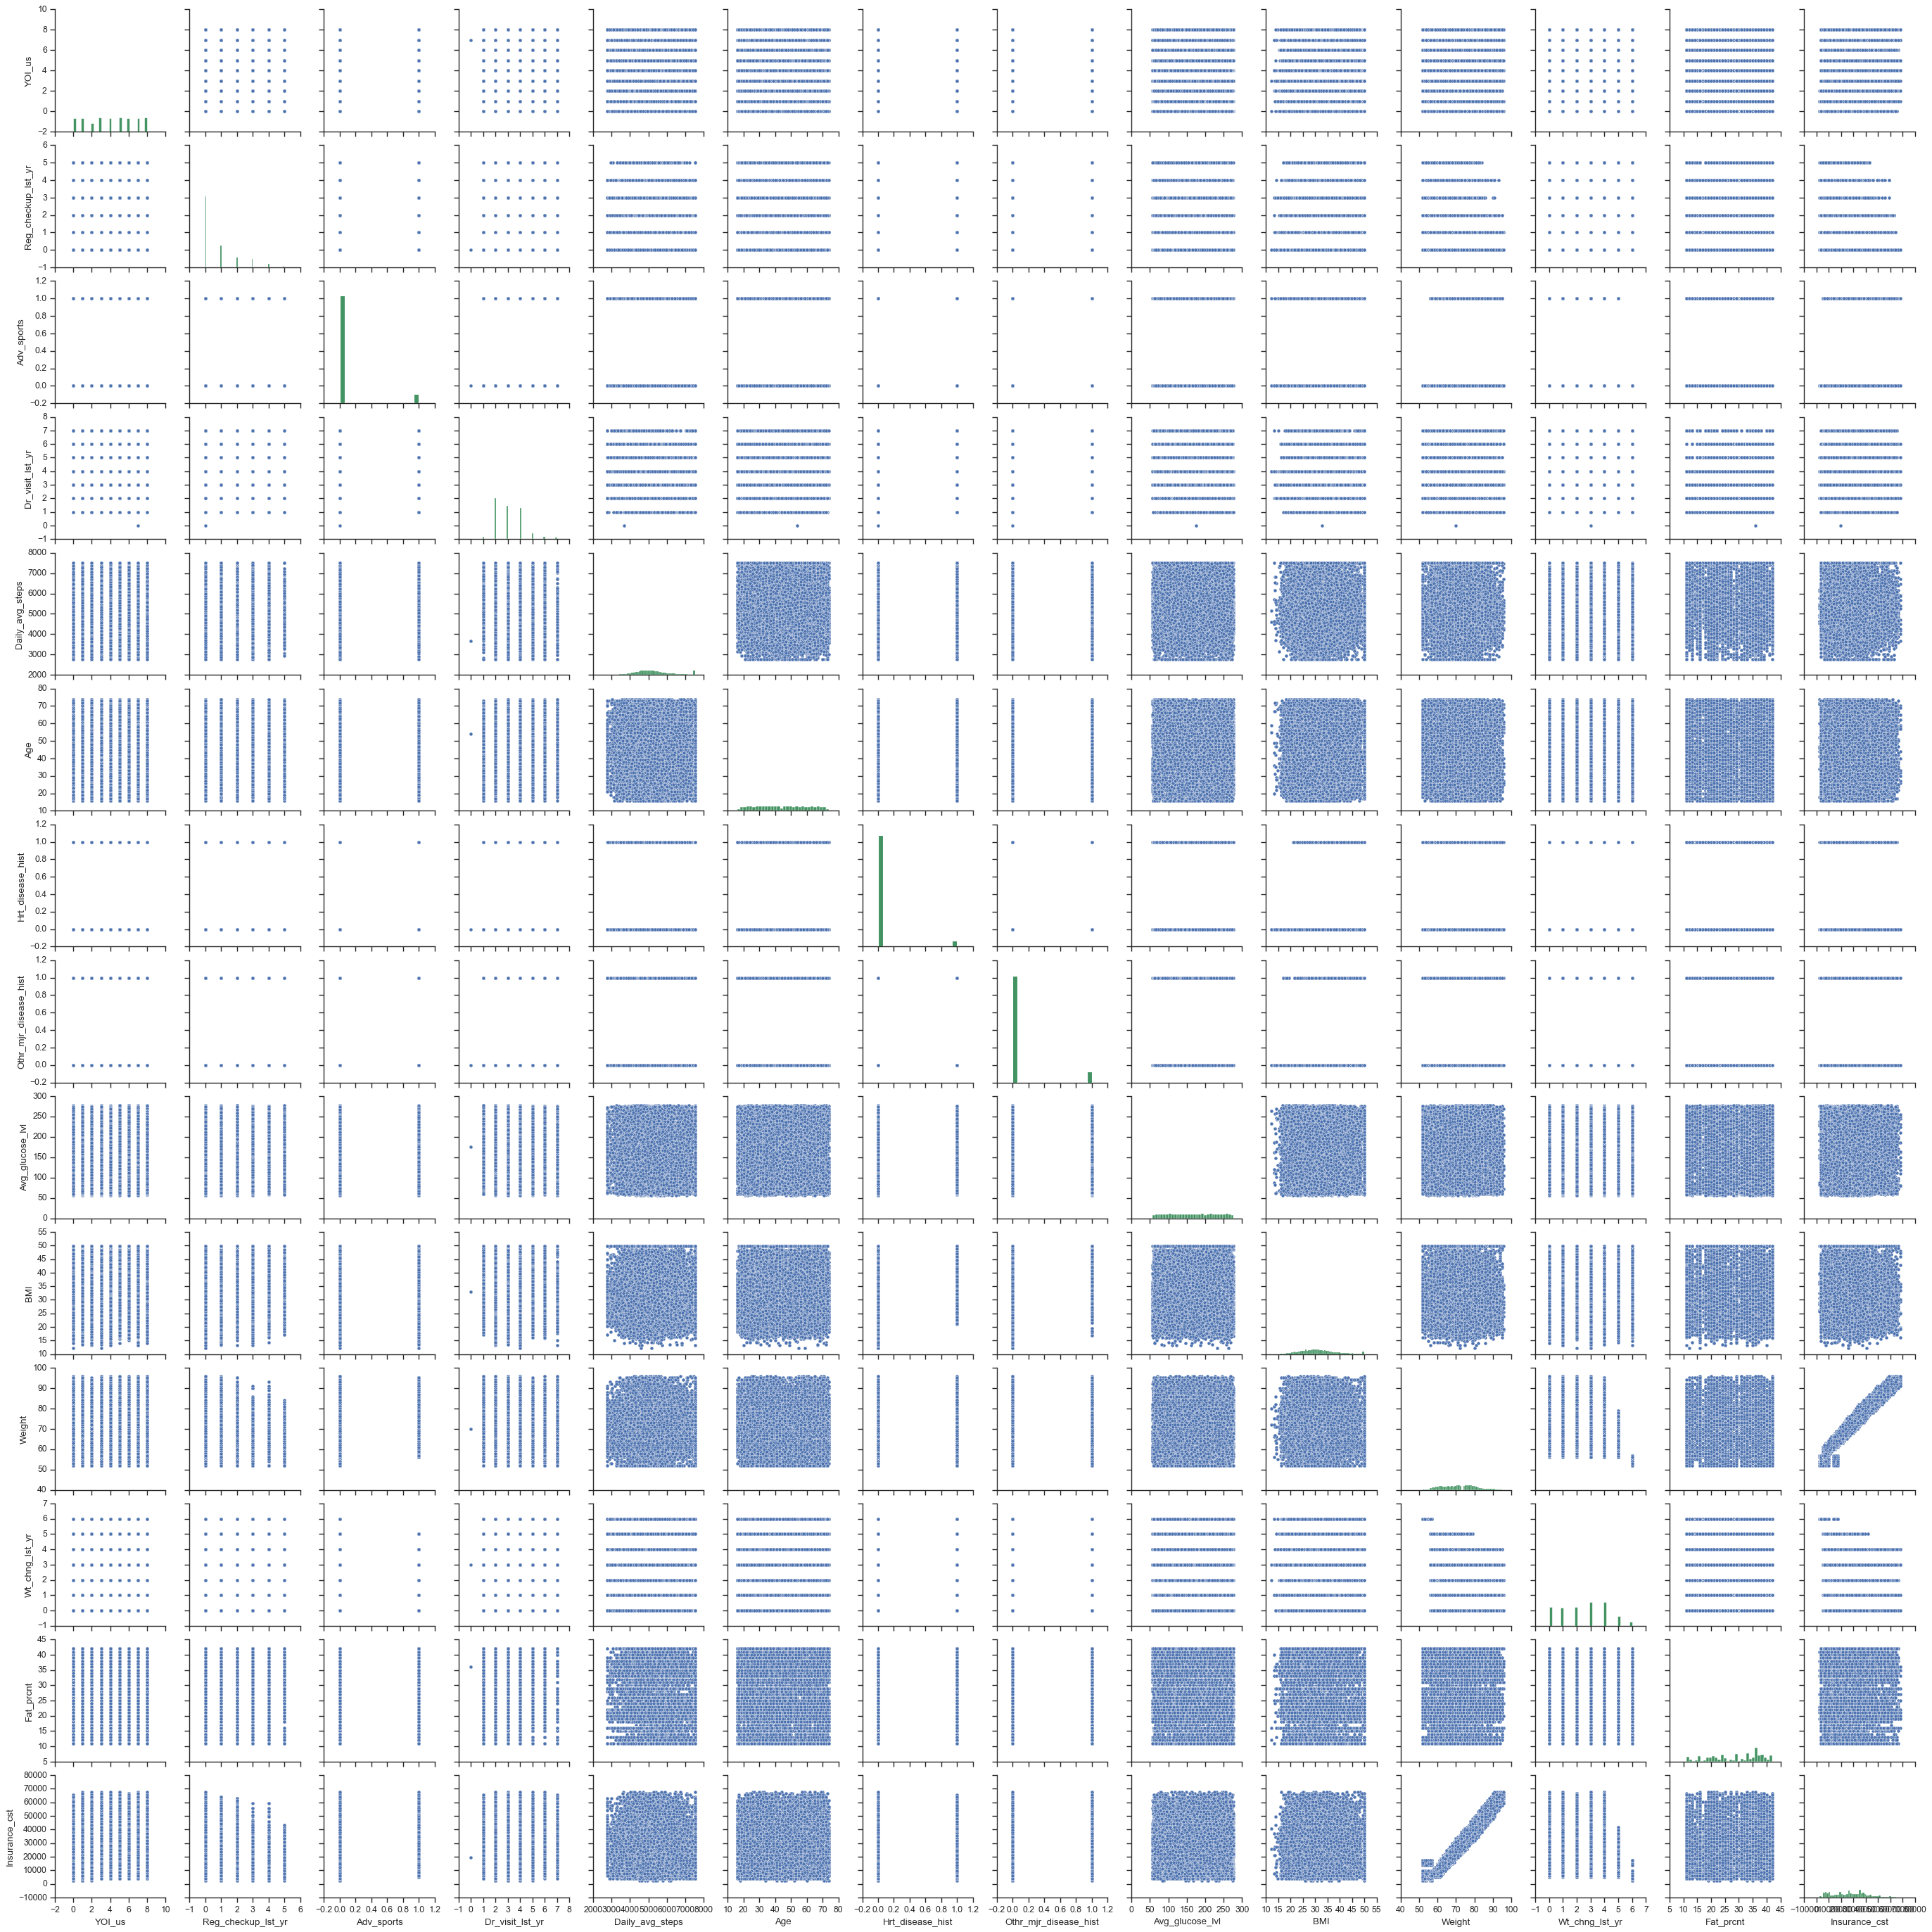

In [168]:
sns.pairplot(df, palette='Greens')

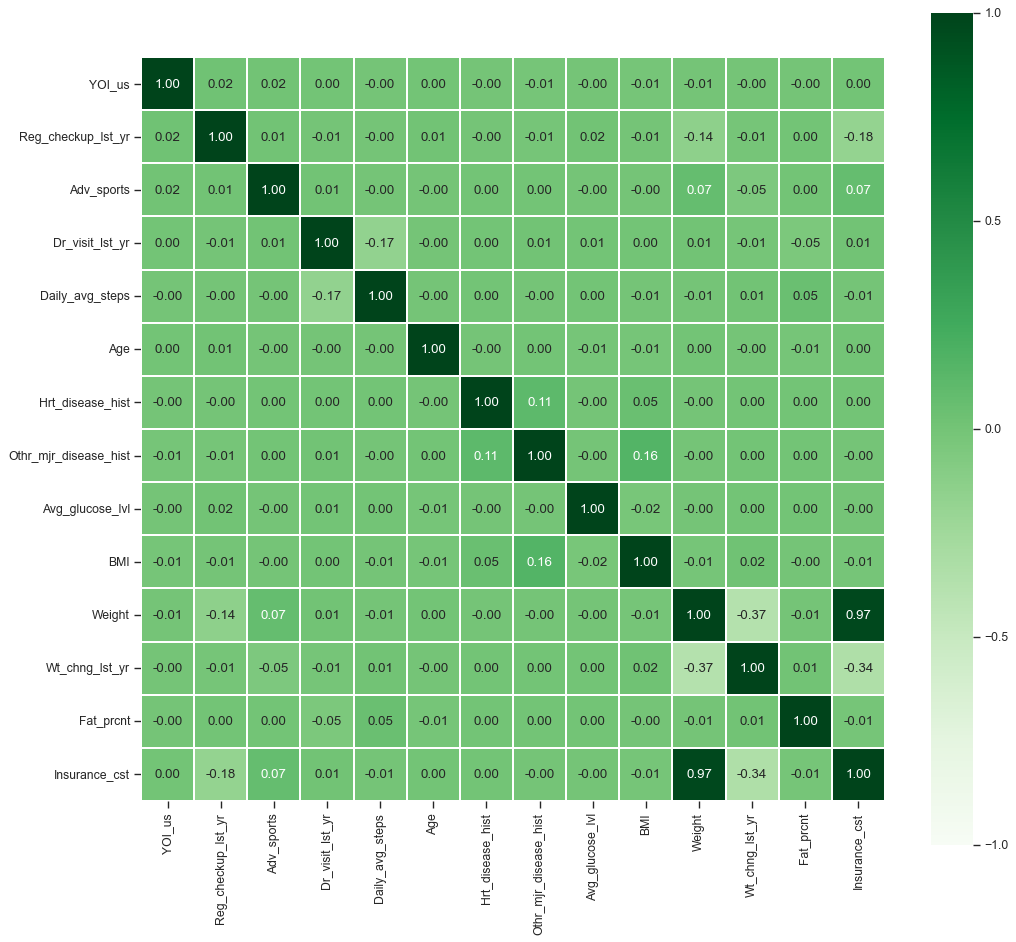

In [169]:
plt.figure(figsize=(15,13))
sns.heatmap(df1.corr(),annot=True,linecolor='white',linewidths=0.005, square=True, vmin = -1, vmax = 1, center=0, fmt = '.2f', cmap='Greens');

### Variable Transformation

In [170]:
# categorical values of variables to numerical

In [171]:
df2

Occupation Cholesterol_level  Gender   Smoking_status   Location  \
0        Salried        125 to 150    Male          Unknown    Chennai   
1        Student        150 to 175    Male  formerly smoked     Jaipur   
2       Business        200 to 225  Female  formerly smoked     Jaipur   
3       Business        175 to 200  Female          Unknown    Chennai   
4        Student        150 to 175    Male     never smoked  Bangalore   
...          ...               ...     ...              ...        ...   
24994   Business        150 to 175  Female          Unknown     Mumbai   
24995    Salried        225 to 250    Male           smokes     Kanpur   
24996   Business        200 to 225    Male     never smoked     Kanpur   
24998    Salried        225 to 250    Male          Unknown      Surat   
24999   Business        150 to 175    Male  formerly smoked    Chennai   

      Other_company_cover Alcohol  Exercise  
0                       N    Rare  Moderate  
1                       N    Rare  Moderate  
2                       N   Daily   Extreme  
3                       Y    Rare        No  
4                       N      No   Extreme  
...                   ...     ...       ...  
24994                   N    Rare  Moderate  
24995                   Y    Rare  Moderate  
24996                   N    Rare  Moderate  
24998                   N    Rare  Moderate  
24999                   N      No        No  

[24010 rows x 8 columns]

In [172]:
df2.drop('Cholesterol_level',axis=1,inplace=True)
df2

Occupation  Gender   Smoking_status   Location Other_company_cover  \
0        Salried    Male          Unknown    Chennai                   N   
1        Student    Male  formerly smoked     Jaipur                   N   
2       Business  Female  formerly smoked     Jaipur                   N   
3       Business  Female          Unknown    Chennai                   Y   
4        Student    Male     never smoked  Bangalore                   N   
...          ...     ...              ...        ...                 ...   
24994   Business  Female          Unknown     Mumbai                   N   
24995    Salried    Male           smokes     Kanpur                   Y   
24996   Business    Male     never smoked     Kanpur                   N   
24998    Salried    Male          Unknown      Surat                   N   
24999   Business    Male  formerly smoked    Chennai                   N   

      Alcohol  Exercise  
0        Rare  Moderate  
1        Rare  Moderate  
2       Daily   Extreme  
3        Rare        No  
4          No   Extreme  
...       ...       ...  
24994    Rare  Moderate  
24995    Rare  Moderate  
24996    Rare  Moderate  
24998    Rare  Moderate  
24999      No        No  

[24010 rows x 7 columns]

In [173]:
for i in df2.columns:
    df[i] = pd.Categorical(df[i]).codes

df

YOI_us  Reg_checkup_lst_yr  Adv_sports  Occupation  Dr_visit_lst_yr  \
0         3.0                   1           1           1              2.0   
1         0.0                   0           0           2              4.0   
2         1.0                   0           0           0              4.0   
3         7.0                   4           0           0              2.0   
4         3.0                   1           0           2              2.0   
...       ...                 ...         ...         ...              ...   
24994     7.0                   0           0           0              3.0   
24995     3.0                   0           0           1              4.0   
24996     6.0                   0           0           0              4.0   
24998     1.0                   0           0           1              2.0   
24999     8.0                   2           0           0              4.0   

      Cholesterol_level  Daily_avg_steps   Age  Hrt_disease_hist  \
0            125 to 150         4866.000  28.0                 1   
1            150 to 175         6411.000  50.0                 0   
2            200 to 225         4509.000  68.0                 0   
3            175 to 200         6214.000  51.0                 0   
4            150 to 175         4938.000  44.0                 0   
...                 ...              ...   ...               ...   
24994        150 to 175         5494.000  43.0                 0   
24995        225 to 250         5614.000  22.0                 0   
24996        200 to 225         4719.000  58.0                 0   
24998        225 to 250         7512.375  27.0                 0   
24999        150 to 175         5882.000  22.0                 1   

       Othr_mjr_disease_hist  ...   BMI  Smoking_status  Location  Weight  \
0                          0  ...  31.2               0         3    67.0   
1                          0  ...  34.2               1         6    58.0   
2                          0  ...  40.4               1         6    73.0   
3                          0  ...  22.9               0         3    71.0   
4                          1  ...  26.5               2         1    74.0   
...                      ...  ...   ...             ...       ...     ...   
24994                      0  ...  27.4               0        11    61.0   
24995                      0  ...  36.1               3         7    79.0   
24996                      0  ...  31.3               2         7    66.0   
24998                      0  ...  26.6               0        14    74.0   
24999                      0  ...  41.6               1         3    57.0   

       Other_company_cover  Alcohol  Exercise  Wt_chng_lst_yr  Fat_prcnt  \
0                        0        2         1             1.0       25.0   
1                        0        2         1             3.0       27.0   
2                        0        0         0             0.0       32.0   
3                        1        2         2             3.0       37.0   
4                        0        1         0             0.0       34.0   
...                    ...      ...       ...             ...        ...   
24994                    0        2         1             5.0       36.0   
24995                    1        2         1             4.0       40.0   
24996                    0        2         1             2.0       28.0   
24998                    0        2         1             0.0       40.0   
24999                    0        1         2             4.0       21.0   

       Insurance_cst  
0            20978.0  
1             6170.0  
2            28382.0  
3            27148.0  
4            29616.0  
...              ...  
24994        13574.0  
24995        39488.0  
24996        14808.0  
24998        30850.0  
24999         6170.0  

[24010 rows x 22 columns]

In [174]:
for i in (df[['Adv_sports','Hrt_disease_hist','Othr_mjr_disease_hist']]):
    df[i] =  df[i] = pd.Categorical(df[i]).codes

In [175]:
df.Cholesterol_level = df.Cholesterol_level.replace(['125 to 150','150 to 175','175 to 200','200 to 225','225 to 250'],['1','2','3','4','5'])
df.Cholesterol_level = df.Cholesterol_level.astype('int64')

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24010 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YOI_us                 24010 non-null  float64
 1   Reg_checkup_lst_yr     24010 non-null  int64  
 2   Adv_sports             24010 non-null  int8   
 3   Occupation             24010 non-null  int8   
 4   Dr_visit_lst_yr        24010 non-null  float64
 5   Cholesterol_level      24010 non-null  int64  
 6   Daily_avg_steps        24010 non-null  float64
 7   Age                    24010 non-null  float64
 8   Hrt_disease_hist       24010 non-null  int8   
 9   Othr_mjr_disease_hist  24010 non-null  int8   
 10  Gender                 24010 non-null  int8   
 11  Avg_glucose_lvl        24010 non-null  float64
 12  BMI                    24010 non-null  float64
 13  Smoking_status         24010 non-null  int8   
 14  Location               24010 non-null  int8   
 15  We

In [177]:
lrm = smf.ols(formula= 'Insurance_cst ~ YOI_us+Reg_checkup_lst_yr+Adv_sports+Occupation+Dr_visit_lst_yr+Cholesterol_level+Daily_avg_steps+Age+Hrt_disease_hist+Othr_mjr_disease_hist+Gender+Avg_glucose_lvl+BMI+Smoking_status+Location+Weight+Other_company_cover+Alcohol+Exercise+Wt_chng_lst_yr+Fat_prcnt', data=df).fit()

In [178]:
print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:          Insurance_cst   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.958e+04
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:08:01   Log-Likelihood:            -2.2906e+05
No. Observations:               24010   AIC:                         4.582e+05
Df Residuals:                   23988   BIC:                         4.583e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -7.974e+

In [179]:
lrm = smf.ols(formula= 'Insurance_cst ~ Reg_checkup_lst_yr+Adv_sports+Dr_visit_lst_yr+Age+Hrt_disease_hist+Weight+Other_company_cover+Wt_chng_lst_yr', data=df).fit()

print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:          Insurance_cst   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 5.140e+04
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:08:01   Log-Likelihood:            -2.2906e+05
No. Observations:               24010   AIC:                         4.581e+05
Df Residuals:                   24001   BIC:                         4.582e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -7.994e+04    

In [180]:
df.drop(['YOI_us','Occupation','Cholesterol_level','Daily_avg_steps','Othr_mjr_disease_hist','Gender','Avg_glucose_lvl','BMI','Smoking_status','Location','Alcohol','Exercise','Fat_prcnt'], axis = 1, inplace=True)

In [181]:
x = df.drop('Insurance_cst', axis = 1)
y = df.Insurance_cst

In [182]:
x.shape

(24010, 8)

In [183]:
y.shape

(24010,)

In [184]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3, random_state=0)

In [185]:
x_train.shape

(16807, 8)

In [186]:
x_test.shape

(7203, 8)

In [187]:
x_train.head()

Reg_checkup_lst_yr  Adv_sports  Dr_visit_lst_yr   Age  \
8328                    0           0              2.0  66.0   
20566                   0           0              4.0  40.0   
14933                   1           0              2.0  47.0   
3343                    3           0              5.0  56.0   
23014                   3           0              3.0  33.0   

       Hrt_disease_hist  Weight  Other_company_cover  Wt_chng_lst_yr  
8328                  0    66.0                    0             5.0  
20566                 0    75.0                    1             0.0  
14933                 0    66.0                    1             1.0  
3343                  1    71.0                    1             0.0  
23014                 0    57.0                    0             6.0

In [188]:
x_test.head()

Reg_checkup_lst_yr  Adv_sports  Dr_visit_lst_yr   Age  \
16966                   0           0              4.0  45.0   
24476                   4           0              2.0  68.0   
20108                   0           0              2.0  29.0   
623                     0           1              2.0  52.0   
2172                    0           0              3.0  64.0   

       Hrt_disease_hist  Weight  Other_company_cover  Wt_chng_lst_yr  
16966                 0    72.0                    0             1.0  
24476                 0    55.0                    0             6.0  
20108                 0    66.0                    1             4.0  
623                   0    94.0                    0             2.0  
2172                  0    82.0                    0             1.0

# Linear Regression

### Statsmodel

In [189]:
train = pd.concat([x_train,y_train], axis=1)
test = pd.concat([x_test,y_test])

In [190]:
df.columns

Index(['Reg_checkup_lst_yr', 'Adv_sports', 'Dr_visit_lst_yr', 'Age',
       'Hrt_disease_hist', 'Weight', 'Other_company_cover', 'Wt_chng_lst_yr',
       'Insurance_cst'],
      dtype='object')

In [191]:
lrm = smf.ols(formula= 'Insurance_cst ~ Reg_checkup_lst_yr+Adv_sports+Dr_visit_lst_yr+Age+Hrt_disease_hist+Weight+Other_company_cover+Wt_chng_lst_yr', data=df).fit()

In [192]:
lrm.params

Intercept             -79937.147359
Reg_checkup_lst_yr      -432.646025
Adv_sports               169.182377
Dr_visit_lst_yr          -43.917481
Age                        3.791759
Hrt_disease_hist         234.797651
Weight                  1488.545731
Other_company_cover     1192.488907
Wt_chng_lst_yr           160.109006
dtype: float64

In [193]:
print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:          Insurance_cst   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 5.140e+04
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:08:01   Log-Likelihood:            -2.2906e+05
No. Observations:               24010   AIC:                         4.581e+05
Df Residuals:                   24001   BIC:                         4.582e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -7.994e+04    

<AxesSubplot:ylabel='Insurance_cst'>

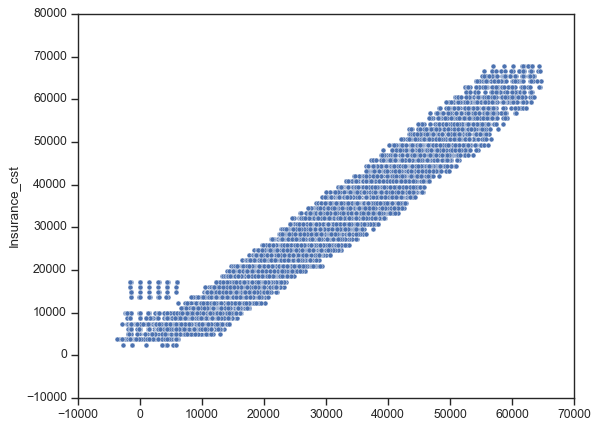

In [194]:
train_pred = lrm.predict(x_train)
sns.scatterplot(train_pred, y_train)

<AxesSubplot:ylabel='Insurance_cst'>

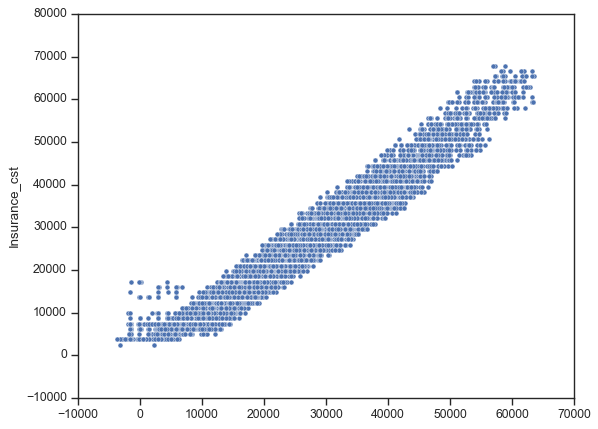

In [195]:
test_pred = lrm.predict(x_test)
sns.scatterplot(test_pred,y_test)

### Scikit learn model

In [196]:
x = df.drop('Insurance_cst', axis = 1)
y = df.Insurance_cst

In [197]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3, random_state=0)

In [198]:
model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [199]:
for i, col_name in enumerate(x_train.columns):
    print('The coefficient of {} is {}'.format(col_name, model.coef_[i]))
print('The intercept of the model is {}'.format(model.intercept_))

The coefficient of Reg_checkup_lst_yr is -440.8645272245702
The coefficient of Adv_sports is 227.26056185438324
The coefficient of Dr_visit_lst_yr is -34.90796637284072
The coefficient of Age is 3.950773432219279
The coefficient of Hrt_disease_hist is 271.25046838892104
The coefficient of Weight is 1487.414135054117
The coefficient of Other_company_cover is 1166.7947321838033
The coefficient of Wt_chng_lst_yr is 166.06024019505176
The intercept of the model is -79895.31842767273


In [200]:
model.score(x_train,y_train)

0.9446849102404874

In [201]:
model.score(x_test, y_test)

0.9452313042831977

In [202]:
test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

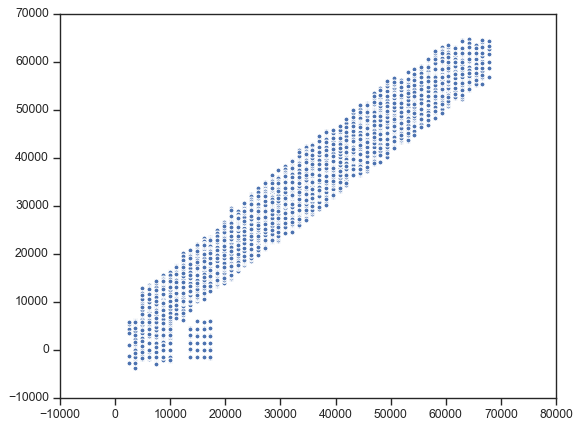

In [203]:
plt.scatter(y_train, train_pred)

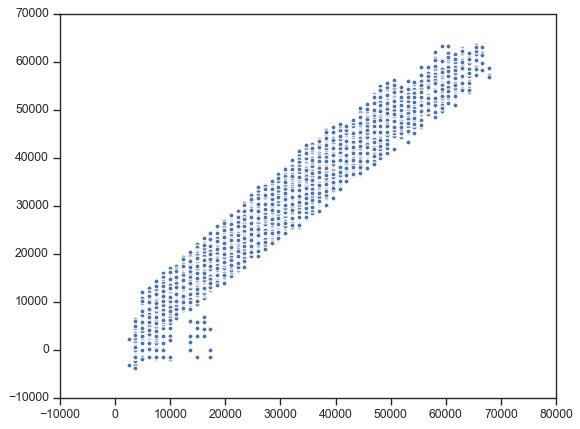

In [204]:
plt.scatter(y_test, test_pred)

# Decision Trees

In [205]:
from sklearn.ensemble import RandomForestRegressor


In [206]:
dt_model = RandomForestRegressor(n_estimators = 100, random_state = 0)


In [207]:
dt_model.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [208]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)


In [209]:
model.score(x_train,y_train)

0.9446849102404874

In [210]:
model.score(x_test,y_test)

0.9452313042831977

# SVM

In [211]:
# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=0)

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
plt.style.use('classic')
import seaborn as sns
sns.set(color_codes = True)
# sns.set_palette('Purples_r')
# sns.set_style('ticks')
# sns.set_context('notebook')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import copy
import os
import pylab 
import warnings 
warnings.filterwarnings("ignore")
# from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo
from scipy.stats import ttest_1samp as tts1
from scipy.stats import ttest_ind as tts
from scipy.stats import ttest_rel as ttr
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import LinearSVC
from sklearn.svm import SVC, SVR


In [213]:
svr = SVR()

In [214]:
svr.fit(x_train,y_train)

SVR()

In [215]:
# x_train = x_train.apply(zscore)
# x_test = x_test.apply(zscore)
# # x_prop = x_prop.apply(zscore)

In [216]:
svr.score(x_train,y_train)

0.04867159306959978

In [217]:
svr.score(x_test,y_test)

0.0485021544879809

In [218]:
df

Reg_checkup_lst_yr  Adv_sports  Dr_visit_lst_yr   Age  \
0                       1           1              2.0  28.0   
1                       0           0              4.0  50.0   
2                       0           0              4.0  68.0   
3                       4           0              2.0  51.0   
4                       1           0              2.0  44.0   
...                   ...         ...              ...   ...   
24994                   0           0              3.0  43.0   
24995                   0           0              4.0  22.0   
24996                   0           0              4.0  58.0   
24998                   0           0              2.0  27.0   
24999                   2           0              4.0  22.0   

       Hrt_disease_hist  Weight  Other_company_cover  Wt_chng_lst_yr  \
0                     1    67.0                    0             1.0   
1                     0    58.0                    0             3.0   
2                     0    73.0                    0             0.0   
3                     0    71.0                    1             3.0   
4                     0    74.0                    0             0.0   
...                 ...     ...                  ...             ...   
24994                 0    61.0                    0             5.0   
24995                 0    79.0                    1             4.0   
24996                 0    66.0                    0             2.0   
24998                 0    74.0                    0             0.0   
24999                 1    57.0                    0             4.0   

       Insurance_cst  
0            20978.0  
1             6170.0  
2            28382.0  
3            27148.0  
4            29616.0  
...              ...  
24994        13574.0  
24995        39488.0  
24996        14808.0  
24998        30850.0  
24999         6170.0  

[24010 rows x 9 columns]

<AxesSubplot:xlabel='Insurance_cst', ylabel='Count'>

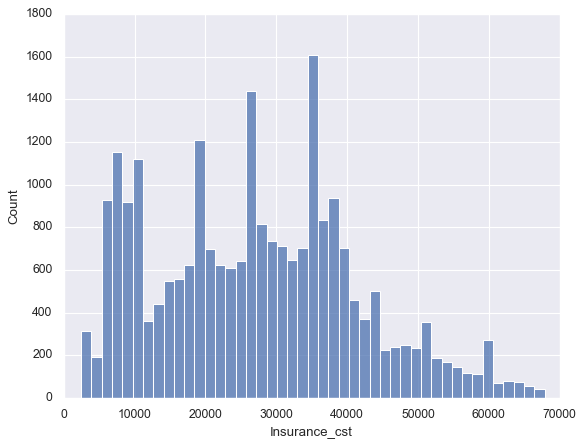

In [219]:
sns.histplot(df.Insurance_cst)

<AxesSubplot:xlabel='Insurance_cst'>

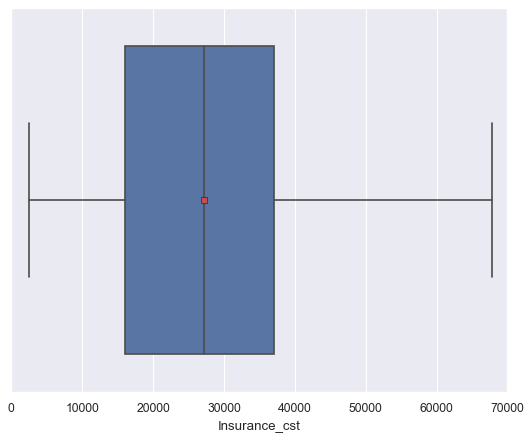

In [220]:
sns.boxplot(df.Insurance_cst, showmeans = True)

In [221]:
24014*0.85

20411.899999999998

# XGBoost Classifier

In [222]:
df['Bins'] = df['Insurance_cst'].copy()

In [223]:
df

Reg_checkup_lst_yr  Adv_sports  Dr_visit_lst_yr   Age  \
0                       1           1              2.0  28.0   
1                       0           0              4.0  50.0   
2                       0           0              4.0  68.0   
3                       4           0              2.0  51.0   
4                       1           0              2.0  44.0   
...                   ...         ...              ...   ...   
24994                   0           0              3.0  43.0   
24995                   0           0              4.0  22.0   
24996                   0           0              4.0  58.0   
24998                   0           0              2.0  27.0   
24999                   2           0              4.0  22.0   

       Hrt_disease_hist  Weight  Other_company_cover  Wt_chng_lst_yr  \
0                     1    67.0                    0             1.0   
1                     0    58.0                    0             3.0   
2                     0    73.0                    0             0.0   
3                     0    71.0                    1             3.0   
4                     0    74.0                    0             0.0   
...                 ...     ...                  ...             ...   
24994                 0    61.0                    0             5.0   
24995                 0    79.0                    1             4.0   
24996                 0    66.0                    0             2.0   
24998                 0    74.0                    0             0.0   
24999                 1    57.0                    0             4.0   

       Insurance_cst     Bins  
0            20978.0  20978.0  
1             6170.0   6170.0  
2            28382.0  28382.0  
3            27148.0  27148.0  
4            29616.0  29616.0  
...              ...      ...  
24994        13574.0  13574.0  
24995        39488.0  39488.0  
24996        14808.0  14808.0  
24998        30850.0  30850.0  
24999         6170.0   6170.0  

[24010 rows x 10 columns]

In [224]:
# print(df.replace.__doc__)

In [225]:
df['Bin_value'] = df['Insurance_cst'].copy()

In [226]:
df['Bin_value'] = pd.qcut(df['Insurance_cst'], q=[0,.25,.5, .75, .85, 1])

In [227]:
df

Reg_checkup_lst_yr  Adv_sports  Dr_visit_lst_yr   Age  \
0                       1           1              2.0  28.0   
1                       0           0              4.0  50.0   
2                       0           0              4.0  68.0   
3                       4           0              2.0  51.0   
4                       1           0              2.0  44.0   
...                   ...         ...              ...   ...   
24994                   0           0              3.0  43.0   
24995                   0           0              4.0  22.0   
24996                   0           0              4.0  58.0   
24998                   0           0              2.0  27.0   
24999                   2           0              4.0  22.0   

       Hrt_disease_hist  Weight  Other_company_cover  Wt_chng_lst_yr  \
0                     1    67.0                    0             1.0   
1                     0    58.0                    0             3.0   
2                     0    73.0                    0             0.0   
3                     0    71.0                    1             3.0   
4                     0    74.0                    0             0.0   
...                 ...     ...                  ...             ...   
24994                 0    61.0                    0             5.0   
24995                 0    79.0                    1             4.0   
24996                 0    66.0                    0             2.0   
24998                 0    74.0                    0             0.0   
24999                 1    57.0                    0             4.0   

       Insurance_cst     Bins            Bin_value  
0            20978.0  20978.0   (16042.0, 27148.0]  
1             6170.0   6170.0  (2467.999, 16042.0]  
2            28382.0  28382.0   (27148.0, 37020.0]  
3            27148.0  27148.0   (16042.0, 27148.0]  
4            29616.0  29616.0   (27148.0, 37020.0]  
...              ...      ...                  ...  
24994        13574.0  13574.0  (2467.999, 16042.0]  
24995        39488.0  39488.0   (37020.0, 40722.0]  
24996        14808.0  14808.0  (2467.999, 16042.0]  
24998        30850.0  30850.0   (27148.0, 37020.0]  
24999         6170.0   6170.0  (2467.999, 16042.0]  

[24010 rows x 11 columns]

In [228]:
df['Bins'] = pd.qcut(df['Insurance_cst'], q=[0,.25,.5, .75, .85, 1], labels = ["Category 1","Category 2","Category 3","Category 4","Category 5"])

In [264]:
df['Bins'] = pd.qcut(df['Insurance_cst'], q=[0,.25,.5, .75, .85, 1], labels = [0,1,2,3,4])

In [265]:
df

Reg_checkup_lst_yr  Adv_sports  Dr_visit_lst_yr   Age  \
0                       1           1              2.0  28.0   
1                       0           0              4.0  50.0   
2                       0           0              4.0  68.0   
3                       4           0              2.0  51.0   
4                       1           0              2.0  44.0   
...                   ...         ...              ...   ...   
24994                   0           0              3.0  43.0   
24995                   0           0              4.0  22.0   
24996                   0           0              4.0  58.0   
24998                   0           0              2.0  27.0   
24999                   2           0              4.0  22.0   

       Hrt_disease_hist  Weight  Other_company_cover  Wt_chng_lst_yr  \
0                     1    67.0                    0             1.0   
1                     0    58.0                    0             3.0   
2                     0    73.0                    0             0.0   
3                     0    71.0                    1             3.0   
4                     0    74.0                    0             0.0   
...                 ...     ...                  ...             ...   
24994                 0    61.0                    0             5.0   
24995                 0    79.0                    1             4.0   
24996                 0    66.0                    0             2.0   
24998                 0    74.0                    0             0.0   
24999                 1    57.0                    0             4.0   

       Insurance_cst Bins            Bin_value  
0            20978.0    1   (16042.0, 27148.0]  
1             6170.0    0  (2467.999, 16042.0]  
2            28382.0    2   (27148.0, 37020.0]  
3            27148.0    1   (16042.0, 27148.0]  
4            29616.0    2   (27148.0, 37020.0]  
...              ...  ...                  ...  
24994        13574.0    0  (2467.999, 16042.0]  
24995        39488.0    3   (37020.0, 40722.0]  
24996        14808.0    0  (2467.999, 16042.0]  
24998        30850.0    2   (27148.0, 37020.0]  
24999         6170.0    0  (2467.999, 16042.0]  

[24010 rows x 11 columns]

In [266]:
df.Bin_value.value_counts()

(2467.999, 16042.0]    6524
(27148.0, 37020.0]     6052
(16042.0, 27148.0]     5843
(40722.0, 67870.0]     3493
(37020.0, 40722.0]     2098
Name: Bin_value, dtype: int64

In [267]:
df.Bins.value_counts()

0    6524
2    6052
1    5843
4    3493
3    2098
Name: Bins, dtype: int64

In [268]:
df

Reg_checkup_lst_yr  Adv_sports  Dr_visit_lst_yr   Age  \
0                       1           1              2.0  28.0   
1                       0           0              4.0  50.0   
2                       0           0              4.0  68.0   
3                       4           0              2.0  51.0   
4                       1           0              2.0  44.0   
...                   ...         ...              ...   ...   
24994                   0           0              3.0  43.0   
24995                   0           0              4.0  22.0   
24996                   0           0              4.0  58.0   
24998                   0           0              2.0  27.0   
24999                   2           0              4.0  22.0   

       Hrt_disease_hist  Weight  Other_company_cover  Wt_chng_lst_yr  \
0                     1    67.0                    0             1.0   
1                     0    58.0                    0             3.0   
2                     0    73.0                    0             0.0   
3                     0    71.0                    1             3.0   
4                     0    74.0                    0             0.0   
...                 ...     ...                  ...             ...   
24994                 0    61.0                    0             5.0   
24995                 0    79.0                    1             4.0   
24996                 0    66.0                    0             2.0   
24998                 0    74.0                    0             0.0   
24999                 1    57.0                    0             4.0   

       Insurance_cst Bins            Bin_value  
0            20978.0    1   (16042.0, 27148.0]  
1             6170.0    0  (2467.999, 16042.0]  
2            28382.0    2   (27148.0, 37020.0]  
3            27148.0    1   (16042.0, 27148.0]  
4            29616.0    2   (27148.0, 37020.0]  
...              ...  ...                  ...  
24994        13574.0    0  (2467.999, 16042.0]  
24995        39488.0    3   (37020.0, 40722.0]  
24996        14808.0    0  (2467.999, 16042.0]  
24998        30850.0    2   (27148.0, 37020.0]  
24999         6170.0    0  (2467.999, 16042.0]  

[24010 rows x 11 columns]

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24010 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Reg_checkup_lst_yr   24010 non-null  int64   
 1   Adv_sports           24010 non-null  int8    
 2   Dr_visit_lst_yr      24010 non-null  float64 
 3   Age                  24010 non-null  float64 
 4   Hrt_disease_hist     24010 non-null  int8    
 5   Weight               24010 non-null  float64 
 6   Other_company_cover  24010 non-null  int8    
 7   Wt_chng_lst_yr       24010 non-null  float64 
 8   Insurance_cst        24010 non-null  float64 
 9   Bins                 24010 non-null  category
 10  Bin_value            24010 non-null  category
dtypes: category(2), float64(5), int64(1), int8(3)
memory usage: 1.9 MB


In [270]:
df3 = df.copy()

In [271]:
from xgboost import XGBClassifier

In [272]:
# pip install xgboost

In [273]:
xgb_clf = XGBClassifier(max_depth = 4)

In [274]:
x = df3.drop(['Insurance_cst','Bins','Bin_value'],axis = 1)
y = df3['Bins']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=0)

In [275]:
x_test

Reg_checkup_lst_yr  Adv_sports  Dr_visit_lst_yr   Age  \
16966                   0           0              4.0  45.0   
24476                   4           0              2.0  68.0   
20108                   0           0              2.0  29.0   
623                     0           1              2.0  52.0   
2172                    0           0              3.0  64.0   
...                   ...         ...              ...   ...   
7916                    5           0              2.0  26.0   
2121                    0           0              3.0  40.0   
11200                   0           0              4.0  38.0   
5654                    1           0              3.0  46.0   
12014                   0           0              4.0  49.0   

       Hrt_disease_hist  Weight  Other_company_cover  Wt_chng_lst_yr  
16966                 0    72.0                    0             1.0  
24476                 0    55.0                    0             6.0  
20108                 0    66.0                    1             4.0  
623                   0    94.0                    0             2.0  
2172                  0    82.0                    0             1.0  
...                 ...     ...                  ...             ...  
7916                  0    69.0                    0             0.0  
2121                  0    64.0                    0             4.0  
11200                 0    74.0                    1             1.0  
5654                  0    85.0                    0             3.0  
12014                 0    56.0                    0             4.0  

[7203 rows x 8 columns]

In [288]:
xgb_clf = XGBClassifier(max_depth = 3,n_estimators=200)

In [289]:
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [290]:
score = xgb_clf.score(x_test, y_test)
print(score)

0.7732889073996946


In [291]:
score = xgb_clf.score(x_train, y_train)
print(score)

0.8135895757719998


In [292]:
train_pred = xgb_clf.predict(x_train)

In [293]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      4569
           1       0.80      0.81      0.80      4084
           2       0.72      0.82      0.77      4260
           3       0.59      0.40      0.48      1462
           4       0.90      0.86      0.88      2432

    accuracy                           0.81     16807
   macro avg       0.79      0.76      0.77     16807
weighted avg       0.81      0.81      0.81     16807



In [294]:
test_pred = xgb_clf.predict(x_test)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1955
           1       0.76      0.77      0.77      1759
           2       0.67      0.77      0.72      1792
           3       0.44      0.30      0.36       636
           4       0.85      0.82      0.84      1061

    accuracy                           0.77      7203
   macro avg       0.73      0.71      0.72      7203
weighted avg       0.77      0.77      0.77      7203



In [295]:
confusion_matrix(y_train, train_pred)

array([[4199,  370,    0,    0,    0],
       [ 295, 3292,  497,    0,    0],
       [   0,  471, 3496,  240,   53],
       [   0,    0,  680,  591,  191],
       [   0,    0,  159,  177, 2096]])

In [296]:
confusion_matrix(y_test, test_pred)

array([[1763,  192,    0,    0,    0],
       [ 143, 1359,  257,    0,    0],
       [   0,  235, 1385,  135,   37],
       [   0,    0,  329,  191,  116],
       [   0,    0,   83,  106,  872]])

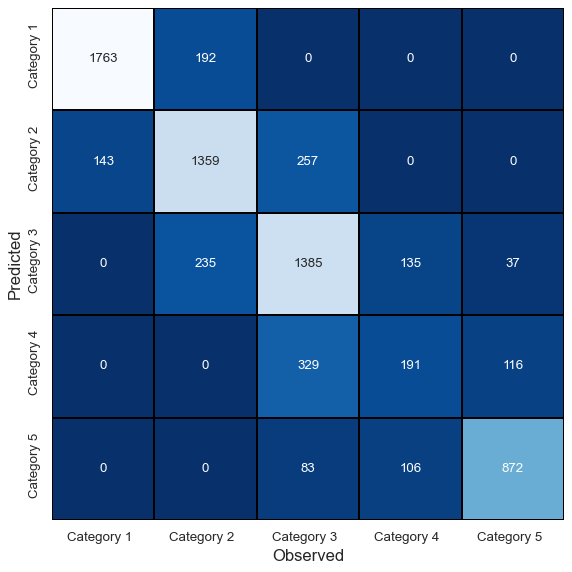

In [313]:
plt.figure(figsize = (10,8))
sns.heatmap(confusion_matrix(y_test, test_pred), cmap = 'Blues_r', fmt = '.0f', annot=True, linecolor='Black', linewidths=0.05,cbar = False, square = True)
plt.xticks([0,1,2,3,4],labels=['    Category 1','    Category 2','    Category 3','    Category 4','    Category 5'], ha='left', size=12)
plt.yticks([0,1,2,3,4],labels=['Category 1    ','Category 2    ','Category 3    ','Category 4    ','Category 5    '], va = 'top', size=12)
plt.ylabel('Predicted',size = 15)
plt.xlabel('Observed', size = 15)
plt.show()